**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Desired Outcome**

We will examine the dataset to identify trends within the reasoning for negative sentiment. This would provide airlines a good reference for areas of their business that could do with improvement.

Ultimately, we will build a classifier model that can accurated predict whether a review (tweet in this case) would be positive or negative.

In [1]:
!pip install contractions



In [2]:
!pip install wordcloud

In [3]:
# install and import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import matplotlib.pyplot as plt                         # Used for plotting
import seaborn as sns                                   # Used for plotting
from collections import Counter     

import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clwn3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clwn3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clwn3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#Reading in data
data=pd.read_csv('Tweets.csv')

In [5]:
data.shape  


(14640, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Missing Value Analysis**


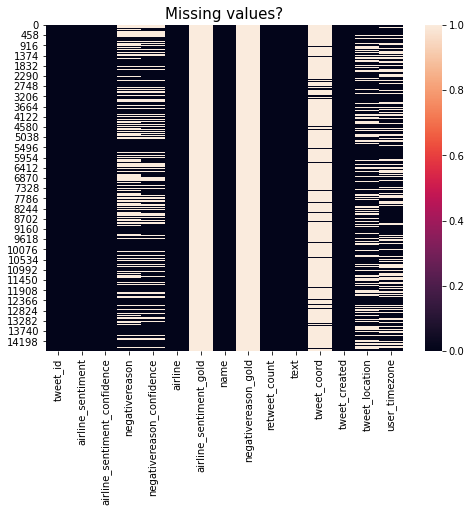

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()



## Observations:

- NegativeReason has some missing values, this is most likely due to not all airline_sentiment being negative. There wouldn't be a reason if the tweet is positive or neautral.

- airline_sentiment_gold is completely empty, as is negative_sentiment_gold. I am not entirely sure what these feautres are. They will be dropped regardless, so it is not important.

- The most important features for our business case does not have any missing values. Specifically: text, airline, airline_sentiment, retweet_count

- We will not need to do anything with the NULL values, as our target variable is all present.



In [10]:
data.isnull().sum(axis=0)    

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Plot the distribution of all tweets among each airline

In [11]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

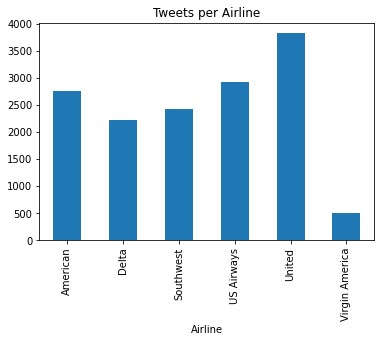

In [12]:
plt.title("Tweets per Airline")
tweet_cpt = data["airline"].groupby(data["airline"]).count()
tweet_cpt.plot(kind="bar")
plt.xlabel("Airline")
plt.show()

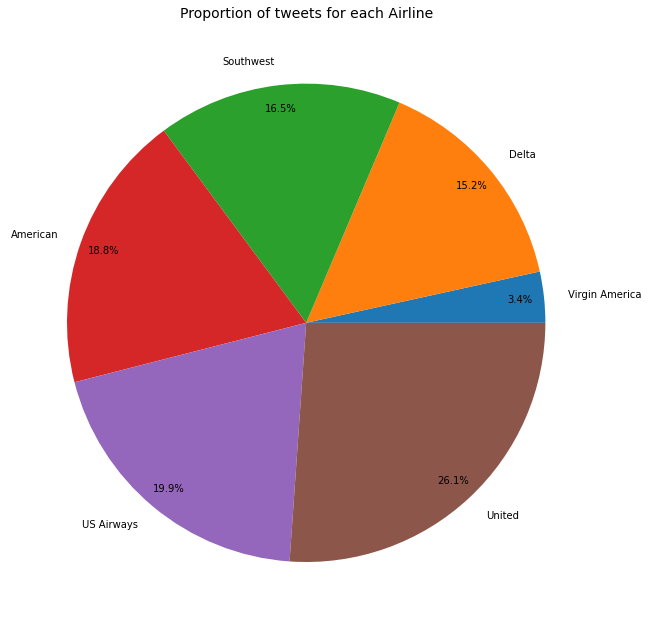

In [13]:
#Using matplotlib
Category=data['airline'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each Airline", fontsize=14);

## Observation:

- Virgin America is under represented as the distribution of tweets favor the other airlines. I suspect due to the low count of tweets, we will see a higher rate of predicting either positive/negative in respect to Virgin America

- United is the highest represented airline in our dataset

- The remaining airlines all have relatively equal representation

## Plot the distribution of sentiment across all the tweets

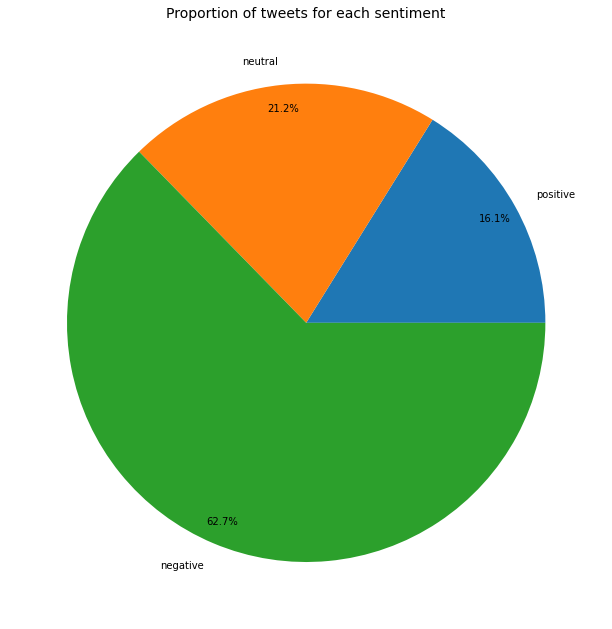

In [14]:
#Using matplotlib
Category=data['airline_sentiment'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each sentiment", fontsize=14);

## Observation:

- The tweets are significantly more negative than neutral, or positive

- It suggests that airlines overall have a more negative sentiment with twitter users. This could represent a natural negative bias towards the airline industry

- Alternatively, this may simply be the over-representation of user behavior preferences. People might simply love to complain more than praise airlines for the basics.

- When we build a model, it should perform well on predicting negative sentiment due to the unbalanced over-representation of negative sentiment in the data set.

## Plot the distribution of Sentiment of tweets for each airline

In [15]:
air_senti = data.groupby(['airline', 'airline_sentiment'])['airline'].count().unstack().fillna(0)
air_senti


airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

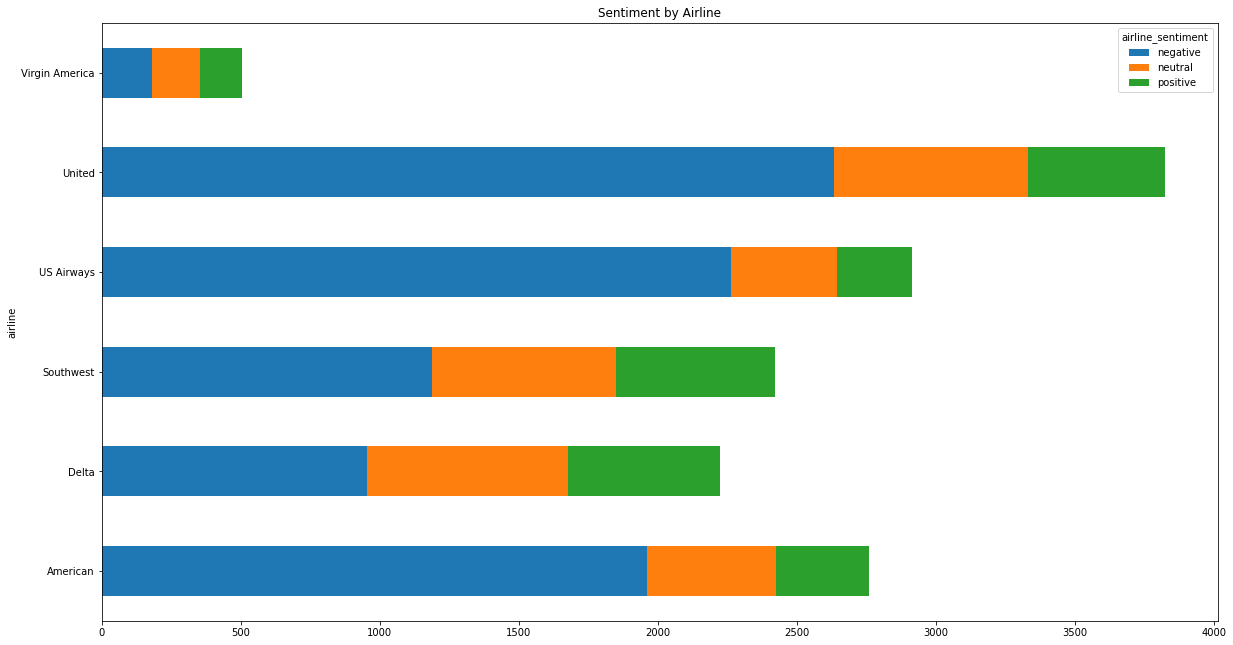

In [16]:
air_senti.plot(kind='barh', stacked=True, figsize=[20,11])
plt.title('Sentiment by Airline')
plt.xticks(rotation=0, ha='center')

## Observation:

- Virgin America is a outlier. Due to the low volumen of tweets, the representation of sentiment is not thhe same as the other airlines.

- Virgin America has a more balanced distribution of sentiment than the other airlines.

- Ignoring Virgin America's distribution of sentiment. The remaining airlines have more negative sentiment than neutral or positive.

- Southwest appears to be the more "liked" airline of those with more thhan 2000 tweets.

- United has the highest representation of sentiment due to the volume of tweets.

- Other than Virgin America, Delta appears to be the most balanced in terms of sentiment distribution.

## Plot the distribution of all the negative reasons.

In [17]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

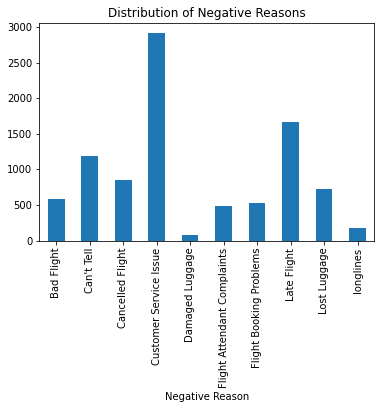

In [18]:
plt.title("Distribution of Negative Reasons")
neg = data["negativereason"].groupby(data["negativereason"]).count()
neg.plot(kind="bar")
plt.xlabel("Negative Reason")
plt.show()

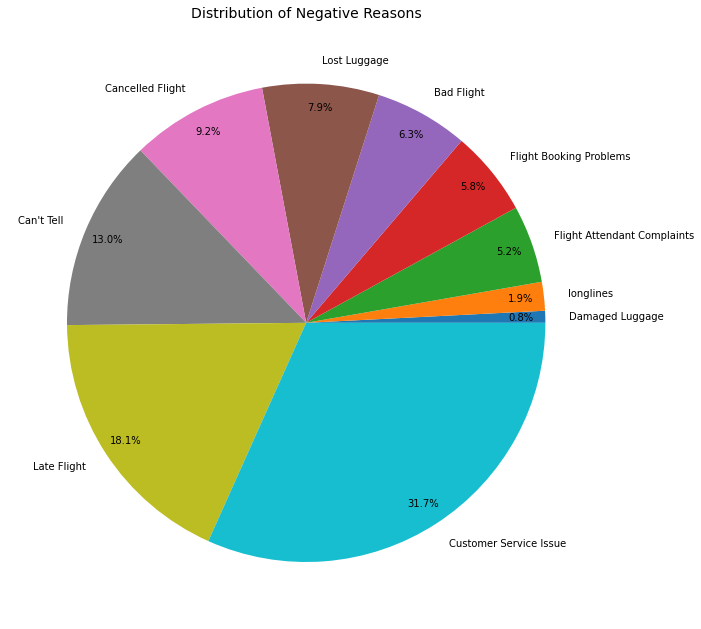

In [19]:
#Using matplotlib
Category=data['negativereason'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", labels=labels, pctdistance=0.9)
plt.title("Distribution of Negative Reasons", fontsize=14);

## Observation:

- The majority of negative sentiment is brought upon by poor customer service, as seen by the large share of negative tweets being attributed to Customer Service Issues.

- Interestingly, airlines appear to not damage luggage in large volumes. Or customers who experience damaged luggage may simply not tweet about it, or consider it a customer service issue.

- The negative reasons present provide airlines with a good reference for understanding customers expectations, and what they may value in terms of experience with airlines.


## Plot the word cloud graph of tweets for positive and negative sentiment separately.

In [20]:
tweets = data.copy()

In [21]:
Positive_sent = tweets[tweets['airline_sentiment']=='positive']
Negative_sent = tweets[tweets['airline_sentiment']=='negative']



In [22]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178


In [23]:
tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [24]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

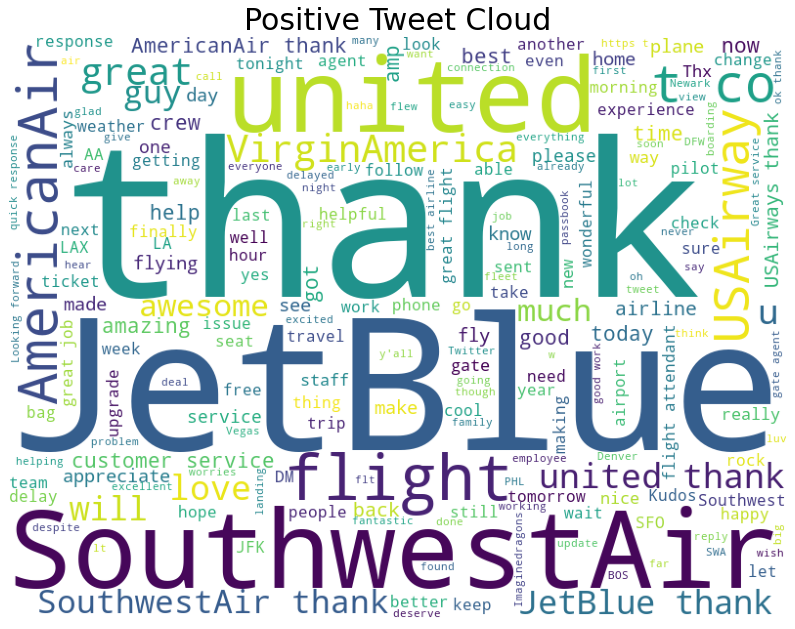

In [25]:
show_wordcloud(Positive_sent, "Positive Tweet Cloud")

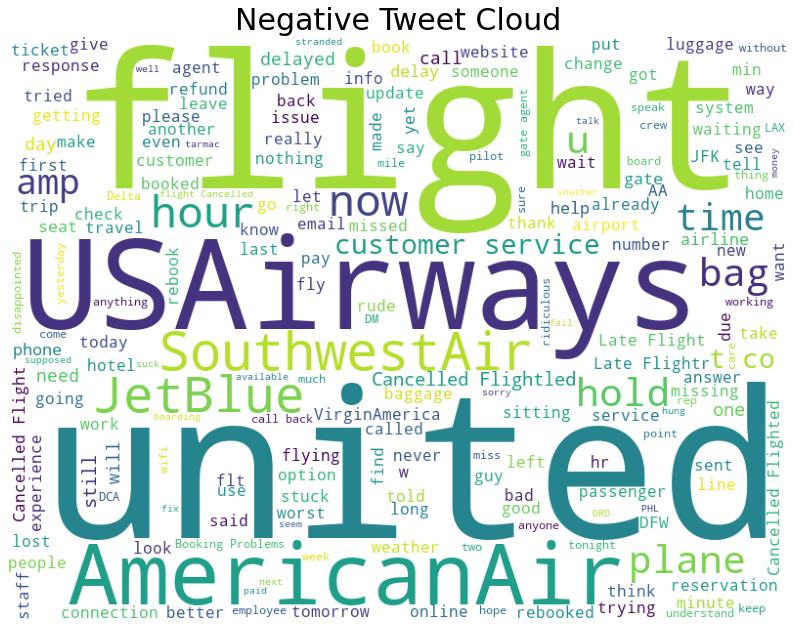

In [26]:
show_wordcloud(Negative_sent, "Negative Tweet Cloud")

## Observation:

The word clouds capture "http", numbers and other anomoalys that will be stripped out during data pre-processing.

I will generate word clouds again after we have cleaned up the tweets for the model.

The assignment instructions asked us to produce these word clouds before the pre-processing steps, so I have done that.

# Data Preparation & Pre-Processing

In [27]:
data = data.loc[:14641, ['airline_sentiment', 'text']]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [29]:
data.isnull().sum(axis=0)

airline_sentiment    0
text                 0
dtype: int64

In [30]:
data.shape

(14640, 2)

In [31]:
data.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# HTML Tag Removal

In [32]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [33]:
# Removal of the http links using Regular Expression.
for i, row in data.iterrows():
    clean_data = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_data
data.head()



,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Remove the numbers

In [34]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()



,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Replacing Contractions

In [35]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in data.iterrows():
    content = data.at[i, 'text']
    clean_content = replace_contractions(content)
    data.at[i,'text'] = clean_content
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


# Tokenization

In [36]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


#  Removal of Special Characters and Punctuations

In [37]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [38]:
data['text'] = data['text'].apply(lambda x: remove_non_ascii(x))
data.head()



,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


In [39]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words



In [40]:
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commer..."
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean..."
3,negative,"[VirginAmerica, it, is, really, aggressive, to..."
4,negative,"[VirginAmerica, and, it, is, a, really, big, b..."


# Conversion to lowercase

In [41]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words



In [42]:
data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, must, mean..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


# Removal of stopwords

In [43]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clwn3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

#Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist))



In [45]:
print(stopwords)

["you've", 'other', 'ain', "it's", 'under', 't', "don't", 's', 'whom', 'an', 'on', 'herself', 'did', 'once', 'most', 'me', 'before', 'all', 'your', 'him', 'from', 'am', 'myself', 'ourselves', 'at', 'when', 'no', 'into', 'by', 'until', 'few', 'to', 'down', 'have', 'do', 'for', 'hers', 'if', 'own', 'against', 'with', 'who', 'had', 'such', 'ours', 'he', 'will', 'again', 'in', 'which', 'are', 'yourself', "should've", 'be', 'during', 'or', 'we', 'couldn', 'my', 'now', 'yours', 'this', 'more', 'themselves', "aren't", 'll', 'what', 'doing', 've', 'she', 'while', 'these', 'of', "that'll", 'over', 'why', 'so', 'out', 'himself', 'here', 'the', 'too', 'nor', 'they', 'but', 'through', 'them', "you'd", 'you', "you'll", 'where', 'being', 'i', 'about', 'same', 'm', 'can', 'because', 'each', 'those', 'only', 'that', 'some', 'his', 'both', 'any', 'y', 'there', 'been', 'their', 'it', 'off', 'should', 'don', 'how', 'just', 'very', 'a', 'were', 'between', 'after', "you're", 'up', 'is', 'aren', 'and', 'you

In [46]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [47]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()



,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, expe..."
2,neutral,"[virginamerica, not, today, must, mean, need, ..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


# Lemmatization

In [48]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clwn3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words





In [50]:
data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercial, exper..."
2,neutral,"[virginamerica, not, today, must, mean, need, ..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


# Normalization & Joining Words into List

In [51]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


# First 5 Rows after Pre-Processing

In [52]:
data.head(5)

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [53]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Text column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

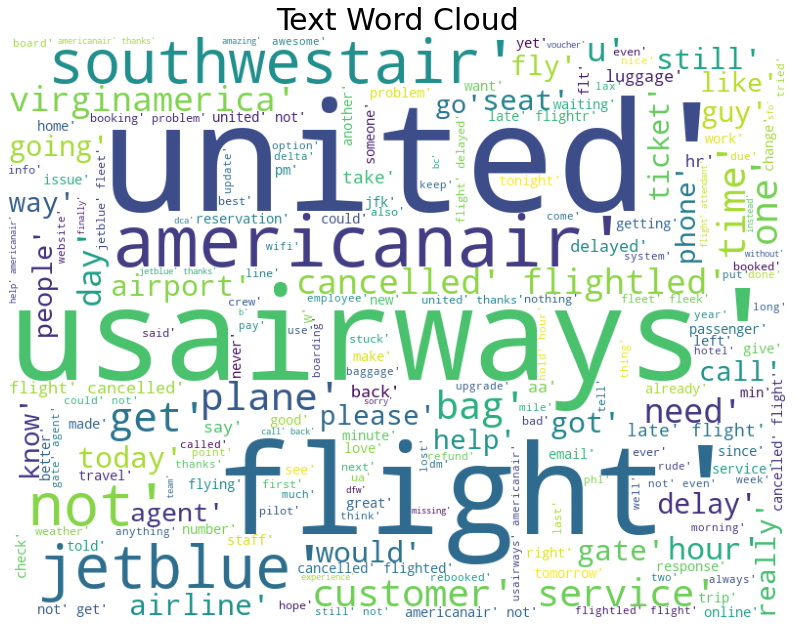

In [54]:
show_wordcloud(data,'Text Word Cloud')

## Observation:

As noted before, through text pre-processing we have eliminated the weblinks and HTML tags resulting in a clean word cloud.

# Vectorization

## CountVectorizer

In [55]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [56]:
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [57]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [58]:
data_features.shape



(14640, 2000)

In [59]:
labels = data['airline_sentiment']
labels


0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [60]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)



In [61]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=20, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=20, n_jobs=4)
0.7245218579234972


## Observation:

- The base random forest model performs relatively well. We will attempt to improve the cross_val_score as we move forward with a K-Fold Cross-validation process.

- Specifically we will tune the base number of learners.

- We wish to see an improvement in accuracy

In [62]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [63]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

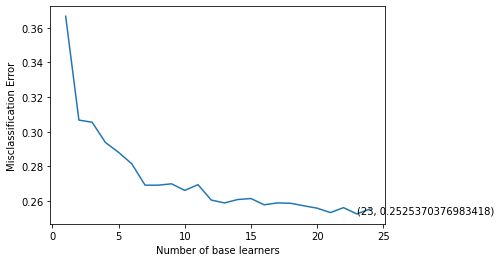

In [64]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()



In [65]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7668488160291439

## Observation:

- The optimal number of estimators results in a score improvement.

- The improvement in score is good.

- I am happy with this score, and will not spend any more time attempting to further tune the model.

In [66]:
result =  clf.predict(X_test)     

[[2527  213   74]
 [ 373  429   82]
 [ 180  102  412]]
0.7668488160291439


<AxesSubplot:>

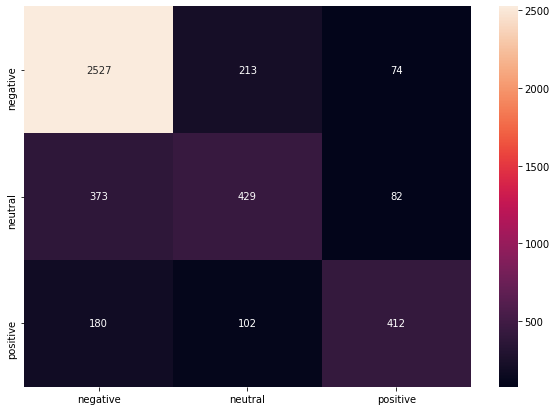

In [67]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = ['negative','neutral','positive'],
columns = ['negative','neutral','positive'] )
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Observation:

- The over-representation of negative sentiment makes predicting "negative" easier as seen in the confusion matrix.

- The model performs well in this area.

- As was expected, the model will struggle with identifying neutral/positive sentiment

- The model struggles the most with identifying positive tweets.

thank thanks not great hour jetblue usairways flight united southwestair customer love virginamerica bag americanair awesome hold cancelled delayed amazing time delay service day best get dm airline hr call still good fleet would never fleek worst please help one 


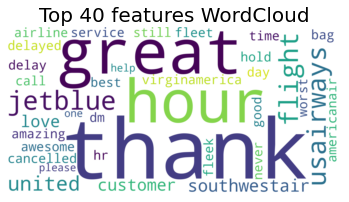

In [68]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
print(top_features)  

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()



## Observation:

- Strong sentiment words like "great" are good indicators of positive sentiment

- "Thank, thanks, love, awesome, best, good" are all strong postive words. This will boost the models ability to accurately predict postive sentiment, especially considering the distribution of positive/negative/neutral within the dataest.

## Term Frequency(TF) - Inverse Document Frequency(IDF)


In [69]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape



(14640, 2000)

In [70]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [71]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=20, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=20, n_jobs=4)
0.6959699453551913


## Observation:

- The base random forest model performs slightly worse on TF-IDF Vectorization compared to the CountVectorization.

- We will use the same tuning as the first random forest model in an attempt to improve the score.

- We will specifically use corss validation to identify the optimal number of estimators for the random forest model.

In [72]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

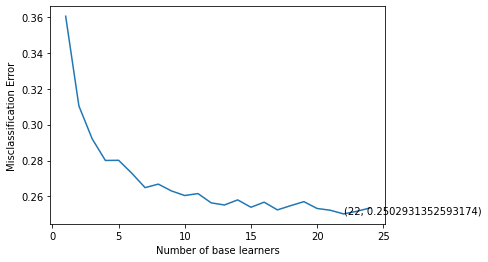

In [73]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [74]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.769808743169399

## Observation:

- The tuned model performs better than the base model.

- This result is in line with the CountVectorization model.

- This suggests that both models are performing at what we can consider "their best". I do not believe we would see any dramatic improvement through further tuning.

- The results of the model are a reflection of the bias within the dataset.

In [75]:
result = clf.predict(X_test)



[[2629  132   53]
 [ 445  375   64]
 [ 226   91  377]]
0.769808743169399


<AxesSubplot:>

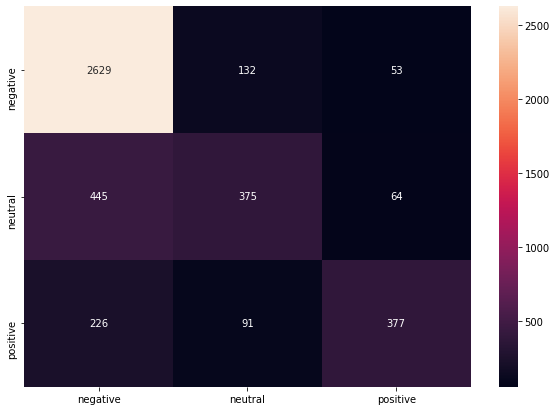

In [76]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = ['negative','neutral','positive'],
columns = ['negative','neutral','positive'] )
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Observation:

- Similarly to the CountVectorization tuned Random Forest model, we see the model perform very well in predicting negative sentiment. This is most likely due to the over-representation of negative sentiment in the dataset.

- Further, we also see similiar performance in the identification of neutral/positive sentiment as compared to the previous models.

- The CountVectorization model performs better of the two, as seen by the difference in total True Positives.

thank thanks not great hour jetblue usairways flight united southwestair customer love virginamerica bag americanair awesome hold cancelled delayed amazing time delay service day best get dm airline hr call still good fleet would never fleek worst please help one 


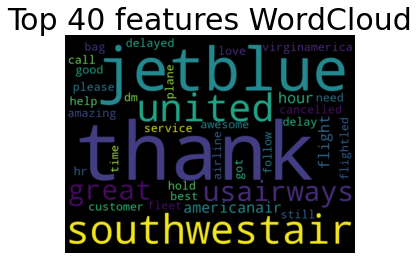

In [77]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
print(top_features)      
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

## Observation:

- Strong sentiment words like "great" are good indicators of positive sentiment

- "Thank, thanks, love, awesome, best, good" are all strong postive words. This will boost the models ability to accurately predict postive sentiment, especially considering the distribution of positive/negative/neutral within the dataest.

- This is very similiar to the previous Word Cloud generated for the first tuned random forest model.

# Conclusion

**Pre-Processing:**

The text pre-processing was an important step to ensure that we accomplished a few things, that would utlimately make classifying and predicting tweet sentiment easier.

Namely: removing HTML tags, stripping links, lemmatizing words all ensured that we condensed the tweets to a baseline, to ensure a more accurate interpretation of sentiment. Through reduction of features, we will see a better performing model in both time and accuracy.

**Vectorization:**
Due to the simplicity of the task and dataset, a CountVectorization approach yielded good results. The frequency of simple, yet strong sentiment words, such as "good", "great", "awesome" did well in both identifying positive and negative tweets. The lack of these strong words, I suspect, would have yielded in identifying neautral sentiment.

**Performance:**

The text data was relatively simple. We did not see a large volume of convulated, or complex statements. Basic emotional words were very apparent. Users appear to be honest and direct in their tweets, with a relative lack of saracasm and irony that could prove to be difficult for a model to correctly classify.

The model tuning yielded good results in both Vectorization methods.

One could potentially spend more time and resources in improving the models. But for our purposes, the model accurately identifed important words, as well as performed well in classifying tweets.

**Overall:**

The model performed well in predicting the negative sentiment. This confirms the observations made during EDA. Due to the over-representation of negative sentiment in the dataset, we will find it easier to predict negative sentiment.

Moving forward, airlines should consideraion of a few things:
- the negative sentiment reasons are good indicators of areas they should focus on improving
- Customer Service is the most commonly referenced reason for negative responses
- Customers are more likely to complain, that to provide positive feedback

If we wish to build a better sentiment predictor, we will need to improve our data collection process. As it currently stands, the model will struggle with predictions for neutral and positive sentiment, as we have a small dataset.

The airlines will theoretically be able to gather more positive tweets if they improve on the areas identified within the "negative reason" feature.

